In [0]:
# to be run with py3bis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os


bd='/Users/luser/GoogleDrive/data/atlases/Schaefer100_Th_Str_Amy_Hippo'

Yeo_flavour = '7'
hemi = 'LH'

atlas_labels_filename = 'Schaefer100_ribbon_subcort_labels_Yeo{}_{}.csv'.format(Yeo_flavour, hemi)



In [0]:
atlas_info = pd.read_csv(atlas_labels_filename)

atlas_info['main_label'].value_counts(dropna=False)

def display_CC(CC, atlas_info, row_cluster=False, col_cluster=False, cmap='coolwarm', center_color=0):
  network_palette = sns.husl_palette(atlas_info['main_label'].nunique(), s=1)
  # network_palette = sns.color_palette("muted",atlas_info['main_label'].nunique())
  network_lut = dict(zip(atlas_info['main_label'].unique(), network_palette))
  network_colors = atlas_info['main_label'].map(network_lut)

  # NB for the row_colors to work, the CC must be placed in a pandas df
  g = sns.clustermap(pd.DataFrame(CC), cmap=cmap,
                     row_colors=network_colors, col_colors=network_colors,
                     row_cluster=row_cluster, col_cluster=col_cluster, center=center_color)

  # Draw the legend bar for the classes
  for label in atlas_info['main_label'].unique():
      g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                              label=label, linewidth=0)

  g.ax_col_dendrogram.legend(loc="center", ncol=4, bbox_to_anchor=(0.5,-4.8))

  # move the colorbar for correlation values
  g.cax.set_position([.15, .2, .03, .45])

  # remove the ticks
  g.ax_heatmap.axis('off');
  return g



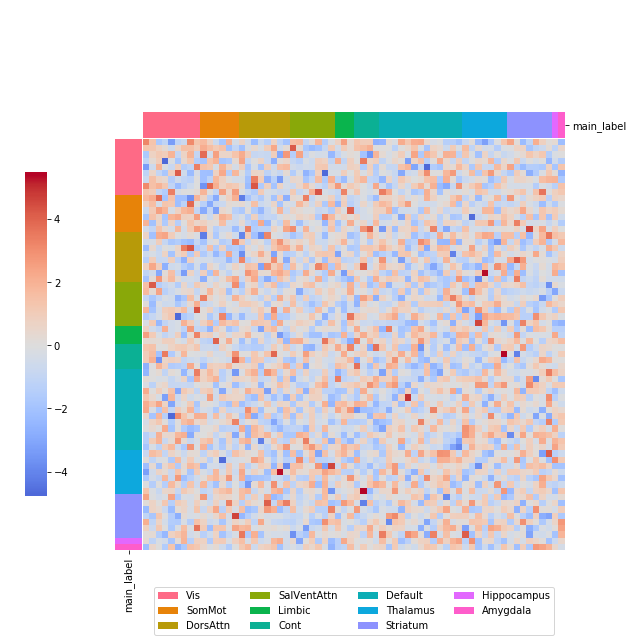

In [0]:

numba_ROIs = len(atlas_info)

CC = np.random.randn(numba_ROIs, numba_ROIs)
CC = CC + CC.T


display_CC(CC , atlas_info);


In [0]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
import numpy as np
output_notebook()

sample1 = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 5000)
sample2 = np.random.multivariate_normal([1,1], [[0.05,0],[0,0.05]], 5000)
sample = np.concatenate([sample1, sample2])

tools = "hover, box_zoom, undo, crosshair"
p = figure(tools=tools)
p.scatter(sample[:,0], sample[:,1], alpha=0.5)
show(p)



## [Wonderful heatmap](https://docs.bokeh.org/en/latest/docs/gallery/les_mis.html)

In [0]:
import numpy as np

from bokeh.plotting import figure, show, output_notebook
from bokeh.sampledata.les_mis import data
output_notebook()


nodes = data['nodes']
names = [node['name'] for node in sorted(data['nodes'], key=lambda x: x['group'])]

N = len(nodes)
counts = np.zeros((N, N))
for link in data['links']:
    counts[link['source'], link['target']] = link['value']
    counts[link['target'], link['source']] = link['value']

colormap = ["#444444", "#a6cee3", "#1f78b4", "#b2df8a", "#33a02c", "#fb9a99",
            "#e31a1c", "#fdbf6f", "#ff7f00", "#cab2d6", "#6a3d9a"]

xname = []
yname = []
color = []
alpha = []
for i, node1 in enumerate(nodes):
    for j, node2 in enumerate(nodes):
        xname.append(node1['name'])
        yname.append(node2['name'])

        alpha.append(min(counts[i,j]/4.0, 0.9) + 0.1)

        if node1['group'] == node2['group']:
            color.append(colormap[node1['group']])
        else:
            color.append('lightgrey')

data=dict(
    xname=xname,
    yname=yname,
    colors=color,
    alphas=alpha,
    count=counts.flatten(),
)


p = figure(title="Les Mis Occurrences",
           x_axis_location="above", tools="hover,save",
           x_range=list(reversed(names)), y_range=names,
           tooltips = [('names', '@yname, @xname'), ('count', '@count')])

p.plot_width = 800
p.plot_height = 800
p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = np.pi/3

p.rect('xname', 'yname', 0.9, 0.9, source=data,
       color='colors', alpha='alphas', line_color=None,
       hover_line_color='black', hover_color='colors')


show(p) # show the plot


Loading BokehJS ...

## [Simple scatterplot](https://thedatafrog.com/interactive-visualization-bokeh-jupyter/)

In [0]:
from bokeh.models import ColumnDataSource, HoverTool
import pandas as pd

output_notebook()

df = pd.DataFrame(sample, columns=('x','y'))
df.head()

df['value'] = np.sqrt(df['x']**2 + df['y']**2)
df.head()



source = ColumnDataSource(df)
tools = "box_zoom, undo, crosshair"
p = figure(tools=tools)
p.scatter('x','y', source=source, alpha=0.5)
p.add_tools(
    HoverTool(
        tooltips=[('value','@value{2.2f}'), 
                  ('index', '@index')]
    )
)
show(p)

Loading BokehJS ...

## [Holoview heatmap](http://holoviews.org/reference/elements/bokeh/HeatMap.html)

In [1]:

from bokeh.io import output_notebook, show
output_notebook()

import numpy as np
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

heatmap = hv.HeatMap(
    (
     np.arange(16), 
     np.arange(16),
     np.arange(16)
    )
)


                      
heatmap.opts(opts.HeatMap(tools=['hover'], colorbar=True, width=325, toolbar='above'))

p = hv.render(heatmap)
show(p)


Output hidden; open in https://colab.research.google.com to view.

## [A more informative Holoview heatmap example](http://holoviews.org/reference/streams/bokeh/heatmap_tap.html)

In [12]:
from bokeh.io import output_notebook, show
output_notebook()

import pandas as pd
import numpy as np
import holoviews as hv
from holoviews import streams
hv.extension('bokeh', width=90)


%opts HeatMap [width=700 height=500 logz=True fontsize={'xticks': '6pt'}, tools=['hover'] xrotation=90] (cmap='RdBu_r') 
%opts Curve [width=375 height=500 yaxis='right'] (line_color='black') {+framewise}

# Declare dataset
df = pd.read_csv('http://assets.holoviews.org/data/diseases.csv.gz', compression='gzip')
dataset = hv.Dataset(df, vdims=[('measles','Measles Incidence')])

# Declare HeatMap
heatmap = hv.HeatMap(dataset.aggregate(['Year', 'State'], np.mean),
                     label='Measles Incidence').select(Year=(1928, 2002))

p = hv.render(heatmap)
show(p)


Output hidden; open in https://colab.research.google.com to view.

In [18]:
data = [(chr(65+i), chr(97+j),  i*j) for i in range(5) for j in range(5) if i!=j]

data

[('A', 'a', 0),
 ('A', 'b', 0),
 ('A', 'c', 0),
 ('A', 'd', 0),
 ('A', 'e', 0),
 ('B', 'a', 0),
 ('B', 'b', 1),
 ('B', 'c', 2),
 ('B', 'd', 3),
 ('B', 'e', 4),
 ('C', 'a', 0),
 ('C', 'b', 2),
 ('C', 'c', 4),
 ('C', 'd', 6),
 ('C', 'e', 8),
 ('D', 'a', 0),
 ('D', 'b', 3),
 ('D', 'c', 6),
 ('D', 'd', 9),
 ('D', 'e', 12),
 ('E', 'a', 0),
 ('E', 'b', 4),
 ('E', 'c', 8),
 ('E', 'd', 12),
 ('E', 'e', 16)]